In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns 

%matplotlib inline 

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/nidhirathod/Desktop/GlobalLandTemperaturesByState.csv")

In [3]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [4]:
df.shape

(645675, 5)

In [5]:
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [6]:
#droping the null values

df = df.dropna(how='any', axis= 0)


In [7]:
df.shape

(620027, 5)

In [8]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [9]:
#renaming the column 

df.rename(columns={'dt': 'date', 'AverageTemperature': 'avg_temp', 'AverageTemperatureUncertainty' : 'confident_interval_temp'}, inplace= True)
df.head()

,date,avg_temp,confident_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [10]:
# defining index to date column and changing its formate 

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='date', length=620027, freq=None)

In [11]:
df.describe()

,avg_temp,confident_interval_temp
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [12]:
#seprate year from the date column 

df['year'] = df.index.year
df.head()

,avg_temp,confident_interval_temp,State,Country,year
date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [13]:
#check the min and max year that we have in our dataset 
df.describe()

,avg_temp,confident_interval_temp,year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


In [14]:
# selecting data from a specific range of year column 

latest_df = df.loc['1980' : '2013']
latest_df.head()

,avg_temp,confident_interval_temp,State,Country,year
date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [15]:
#group average temp based on the countries

latest_df[['Country', 'avg_temp']].groupby(['Country']).mean().sort_values('avg_temp')

,avg_temp
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


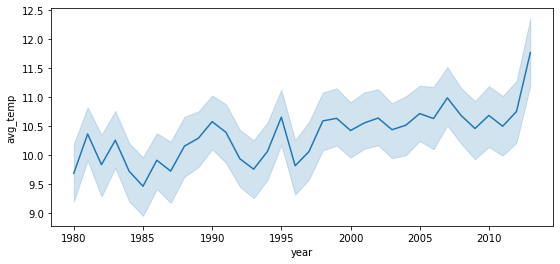

In [16]:
#plot the graph (average temperature of differ year)

plt.figure(figsize=(9,4))
sns.lineplot(x='year', y='avg_temp', data= latest_df)
plt.show()


In [17]:
#Resample the time series to create a more distinct line 

resample_df = latest_df[['avg_temp']].resample('A').mean()
resample_df.head()

,avg_temp
date,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950


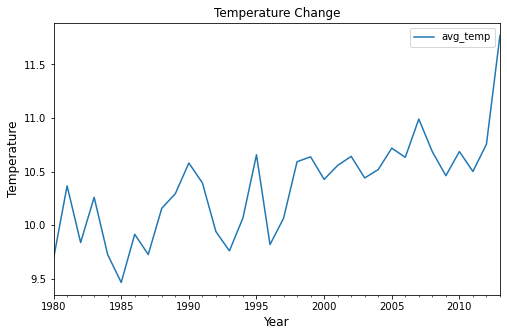

In [18]:
#plotting the graph

resample_df.plot(title='Temperature Change', figsize=(8,5))
plt.ylabel('Temperature', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.legend()

In [19]:
# ADF for testing if the time series is stationary or not 

from statsmodels.tsa.stattools import adfuller

print('Dickey Fuller Test Results:')
test_df = adfuller(resample_df.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(test_df[0:4], index= ['Test Statistic', 'p-value', 'lags used', 'Number of observation used'])
for key, value in test_df[4].items():
    df_output['Critical Value (%s)' %key]= value
print(df_output)


Dickey Fuller Test Results:
Test Statistic                -0.728209
p-value                        0.839307
lags used                      2.000000
Number of observation used    31.000000
Critical Value (1%)           -3.661429
Critical Value (5%)           -2.960525
Critical Value (10%)          -2.619319
dtype: float64


In [20]:
#The Time series is not stationary as , ADF is greater than the critical value 
#Decompose the data, extract components and plot , 'original time series', 'trend', 'seasonal components'. Along with that we will aslo plot 'residual graph'

In [21]:
decomp = seasonal_decompose(resample_df, period=3)

trend = decomp.trend 
seasonal = decomp.seasonal
residual = decomp.resid


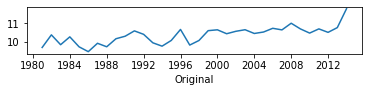

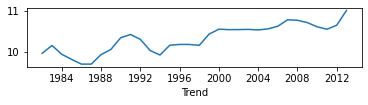

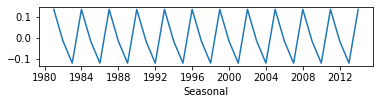

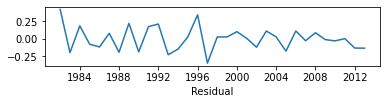

<Figure size 432x360 with 0 Axes>

In [22]:
plt.subplot (411) 
plt.plot (resample_df)
plt.xlabel('Original')
plt.figure(figsize= (6,5))

plt.subplot (412)
plt.plot(trend)
plt.xlabel ('Trend')
plt.figure(figsize=(6,5))

plt.subplot (413)
plt.plot (seasonal)
plt.xlabel ('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot (414)
plt.plot (residual)
plt.xlabel ('Residual')
plt.figure(figsize=(6,5))

plt.tight_layout()

#We can observe that we have an increasing trend line ,which proves that data currently is yet not stationary 


#We want the trend line to be constant over time 


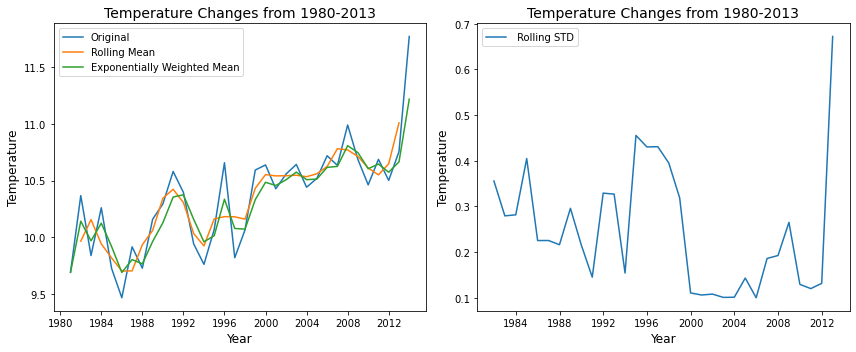

In [23]:
#transform the data , using moving average and exponential smooting 

rol_mean = resample_df.rolling(window=3, center=True).mean()

evm = resample_df. ewm(span=3).mean()

rol_std = resample_df.rolling(window=3, center=True).std()

fig,(ax1, ax2) = plt.subplots (1, 2, figsize=(12,5))
ax1.plot(resample_df, label='Original') 
ax1.plot(rol_mean, label='Rolling Mean')
ax1.plot(evm, label='Exponentially Weighted Mean') 
ax1.set_title('Temperature Changes from 1980-2013', fontsize=14) 
ax1.set_ylabel('Temperature', fontsize=12) 
ax1.set_xlabel('Year',fontsize=12) 
ax1.legend()


ax2.plot(rol_std, label = ' Rolling STD')
ax2.set_title('Temperature Changes from 1980-2013', fontsize=14) 
ax2.set_ylabel('Temperature', fontsize=12) 
ax2.set_xlabel ('Year', fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [24]:
#Applying the ADF test to check the hypothesis 

rol_mean.dropna(inplace=True)
evm.dropna(inplace=True)

print ('Dickey-Fuller Test for the Rolling Mean: ')
df_test = adfuller(rol_mean.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used '])
for key, value in df_test[4].items():
    df_output[' Critical Value (%s) '%key] = value
print(df_output)
print ('')
print('Dickey-FullerITest for the Exponentially Weighted Mean: ')
df_test = adfuller (evm. iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s) '%key] = value
print(df_output)

Dickey-Fuller Test for the Rolling Mean: 
Test Statistic                   0.275101
p-value                          0.976173
Lags Used                        8.000000
Number of Observations Used     23.000000
 Critical Value (1%)            -3.752928
 Critical Value (5%)            -2.998500
 Critical Value (10%)           -2.638967
dtype: float64

Dickey-FullerITest for the Exponentially Weighted Mean: 
Test Statistic                 -0.338693
p-value                         0.919843
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [25]:
#Both the test statistics are greater than the critical value , that is we have failed to reject the "null hypothesis"

#We will use differencing to remove moving average or exponentially weighted mean from the original time series

#differencing on moving average 

diff_rol_mean = resample_df - rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,avg_temp
date,
1981-12-31,0.401781
1982-12-31,-0.316726
1983-12-31,0.318708
1984-12-31,-0.091684
1985-12-31,-0.236199


In [26]:
#differecing on exponentially weighted mean 

diff_ewm = resample_df - evm
diff_ewm.dropna(inplace=True)
diff_ewm.head()



,avg_temp
date,
1980-12-31,0.000000
1981-12-31,0.225574
1982-12-31,-0.129877
1983-12-31,0.136118
1984-12-31,-0.192797


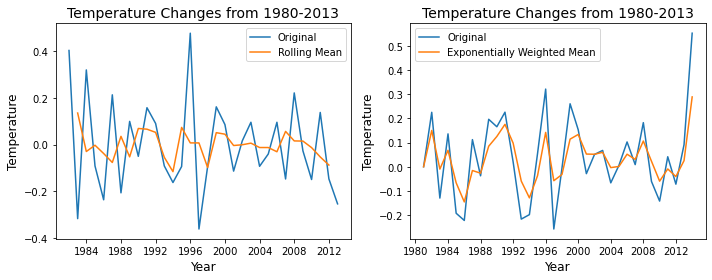

In [27]:
#plot the graph with rolling mean and exponential weighted mean 

df_rol_mean_diff = diff_rol_mean.rolling(window=3, center=True).mean()
df_ewm_diff = diff_ewm.ewm(span=3).mean()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (10,4))

ax1.plot(diff_rol_mean, label= 'Original') 
ax1.plot(df_rol_mean_diff, label='Rolling Mean') 
ax1.set_title('Temperature Changes from 1980-2013', fontsize=14) 
ax1.set_ylabel('Temperature', fontsize=12) 
ax1.set_xlabel('Year', fontsize=12) 
ax1.legend()

ax2.plot(diff_ewm, label='Original')
ax2.plot(df_ewm_diff,label='Exponentially Weighted Mean')
ax2.set_title('Temperature Changes from 1980-2013', fontsize=14)
ax2.set_ylabel('Temperature', fontsize=12) 
ax2.set_xlabel('Year', fontsize=12) 
ax2.legend()

plt.tight_layout()

In [28]:
#Applying Dickey fuller test to check the hypothesis 

print ('Dickey-Fuller Test for the Difference between the Original and Rolling Mean: ')
dftest = adfuller(diff_rol_mean.iloc[:,0].values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used '])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s) '%key] = value
print (dfoutput)
print (' ')
print ('Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean: ')
dftest = adfuller(diff_ewm.iloc[:,0].values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used '])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s) '%key] = value
print(dfoutput)
    



Dickey-Fuller Test for the Difference between the Original and Rolling Mean: 
Test Statistic                 -7.007710e+00
p-value                         7.051586e-10
Lags Used                       1.000000e+00
Number of Observations Used     3.000000e+01
Critical Value (1%)            -3.669920e+00
Critical Value (5%)            -2.964071e+00
Critical Value (10%)           -2.621171e+00
dtype: float64
 
Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean: 
Test Statistic                  -4.297446
p-value                          0.000449
Lags Used                        1.000000
Number of Observations Used     32.000000
Critical Value (1%)             -3.653520
Critical Value (5%)             -2.957219
Critical Value (10%)            -2.617588
dtype: float64


## We can see that Test statistic is less than fot both Rolling mean and Exponentially weighted mean 
SO we can reject the null hypothesis and the data is now stationary 


In [29]:
#Finding the parameters for seasonal auto-regressive integrated moving average , parameters , "p"= autoregressive, "d"=integrated, "q"=moving average. 

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf 
from matplotlib import pyplot 


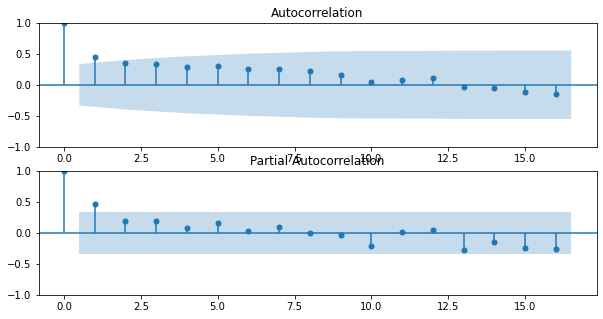

In [30]:
pyplot.figure(figsize= (10,5))
pyplot.subplot(211)
plot_acf(resample_df, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(resample_df, ax=pyplot.gca())
pyplot.show ()


Here the "p" parameter will be the first value on partial autocorrection graph that is significantly different from the previous graph 

The "q" parameter is the largest lag on the autocorrection plot that is significantly different from previous value 

Hence , q could be 0 as there is no significant lag 

The "d" parameter is the number of differences taken to make the Time Series Stationary


for example "d" could be 1 , when we are using one of the transformation 

In [58]:
#Applying ARIMA for forecasting 

from pmdarima import auto_arima

stepwise_fit = auto_arima(resample_df['avg_temp'],trace = True, suppress_warning = True)
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=35.591, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=35.025, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=34.441, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.220 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   34
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -16.221
Date:                Sun, 25 Jun 2023   AIC                             34.441
Time:                        22:27:42   BIC                             35.938
Sample:                    12-31-1980   HQIC                            34.945
                         - 12-31-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1565      0.040      3.958      0.000       0.079       0.234
===================================================================================
Ljung-Box (L1) (Q):                   2.05   Jarque-Bera (JB):                 0.03
Prob(Q):                              0.15   Prob(JB):                         0.99
Heteroskedasticity (H):               0.85   Skew:                             0.03
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
from statsmodels.tsa.arima.model import ARIMA



In [77]:
#spliting the model into training and testing model 

print(resample_df.shape)
train = resample_df.iloc[:-30]
test = resample_df.iloc[-30:]
print(train.shape, test.shape)

(34, 1)
(4, 1) (30, 1)


In [79]:
#Train the Model 

model= ARIMA(train['avg_temp'], order=(1,0,1))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               avg_temp   No. Observations:                    4
Model:                 ARIMA(1, 0, 1)   Log Likelihood                   4.881
Date:                Sun, 25 Jun 2023   AIC                             -1.762
Time:                        22:45:30   BIC                             -4.217
Sample:                    12-31-1980   HQIC                            -7.149
                         - 12-31-1983                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0637      0.016    616.383      0.000      10.032      10.096
ar.L1         -0.9742      0.089    -10.904      0.000      -1.149      -0.799
ma.L1         -0.9740     49.172     -0.020      0.984     -97.349      95.401
sigma2         0.0012      0.060      0.021      0.984      -0.117       0.120
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.93   Prob(JB):                         0.79
Heteroskedasticity (H):                nan   Skew:                             0.30
Prob(H) (two-sided):                   nan   Kurtosis:                         1.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
#Making prediction on the testing section 

start = len(train)
end= len(train)+len(test)-1
pred = model.predict(start=start, end=end, typ='levels')
print(pred)
pred.index = resample_df.index[start:end+1]
#print(pred)


1984-12-31     9.873069
1985-12-31    10.249466
1986-12-31     9.882766
1987-12-31    10.240019
1988-12-31     9.891969
1989-12-31    10.231052
1990-12-31     9.900705
1991-12-31    10.222542
1992-12-31     9.908996
1993-12-31    10.214464
1994-12-31     9.916865
1995-12-31    10.206797
1996-12-31     9.924334
1997-12-31    10.199521
1998-12-31     9.931424
1999-12-31    10.192614
2000-12-31     9.938153
2001-12-31    10.186059
2002-12-31     9.944539
2003-12-31    10.179836
2004-12-31     9.950601
2005-12-31    10.173931
2006-12-31     9.956354
2007-12-31    10.168326
2008-12-31     9.961815
2009-12-31    10.163006
2010-12-31     9.966998
2011-12-31    10.157956
2012-12-31     9.971918
2013-12-31    10.153163
Freq: A-DEC, Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='date'>

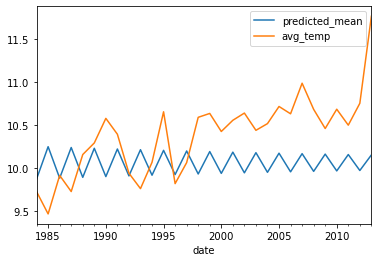

In [86]:
pred.plot(legend=True)
test['avg_temp'].plot(legend=True)

In [89]:
test['avg_temp'].mean()

10.386082020894381

In [91]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['avg_temp']))
print(rmse)

0.5694056873595698


as the mean squared error compare to the average is good, our model is good 


In [92]:
#retrainning the model on the entire dataset 

model2 = ARIMA(resample_df['avg_temp'], order=(1,0,1))
model2 = model2.fit()
resample_df.tail()

,avg_temp
date,
2009-12-31,10.461537
2010-12-31,10.686661
2011-12-31,10.500732
2012-12-31,10.755588
2013-12-31,11.771115


In [113]:
#For Future prediction on the next 5 years 

index_future_dates = pd.date_range(start='2013-12-31', end='2018-01-28') 
#print (index_future_dates)
pred = model2.predict(start=len(resample_df), end=len(resample_df)+5, typ='levels').rename('ARIMA Predictions') 
#print(comp_pred) 
#pred.index=index_future_dates
print(pred)

2014-12-31    10.984286
2015-12-31    10.958853
2016-12-31    10.934581
2017-12-31    10.911417
2018-12-31    10.889310
2019-12-31    10.868213
Freq: A-DEC, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

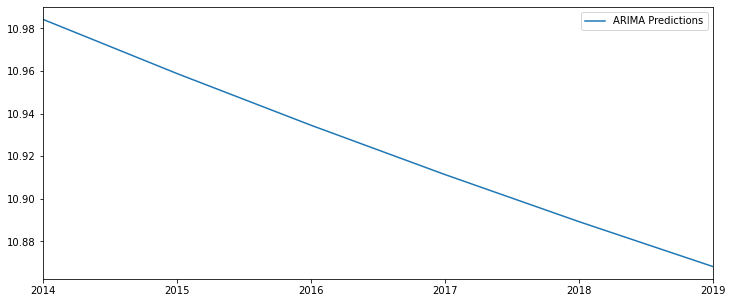

In [118]:
pred.plot(figsize= (12,5),legend=True)